## Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
import scipy as sp
from statsmodels.graphics.gofplots import qqplot
from itertools import cycle, islice
import warnings

## Configuraciones iniciales

In [2]:
warnings.filterwarnings("ignore")

## Datos

In [3]:
df = pd.read_csv("data.csv")
df

,dates,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,Antigua and Barbuda,...,Least Developed Countries,Land Locked Developing Countries,Small Island Developing States,Low Income Food Deficit Countries,Net Food Importing Developing Countries,Annex I countries,Non-Annex I countries,OECD,Year,Month
0,1961-01-31,0.777,0.180,-1.022,0.565,-0.518,0.209,0.617,-1.807,0.656,...,0.349,0.169,-0.034,0.350,0.266,0.808,0.108,0.437,1961,1
1,1961-02-28,-1.743,-0.625,0.196,0.261,3.383,-0.545,0.382,-0.471,0.410,...,-0.897,-0.730,0.195,-1.058,-0.594,1.155,-0.384,0.756,1961,2
2,1961-03-31,0.516,0.995,-1.051,-0.831,1.559,0.170,0.004,-2.035,-0.265,...,-0.333,-0.526,0.137,-0.224,-0.200,0.826,-0.163,0.205,1961,3
3,1961-04-30,-1.709,2.412,1.720,0.068,2.486,0.116,0.276,-1.477,0.000,...,0.085,0.460,0.132,0.035,0.244,0.327,0.238,-0.029,1961,4
4,1961-05-31,1.412,-0.515,1.863,0.133,0.545,0.786,0.218,0.497,0.116,...,0.631,0.525,-0.006,0.528,0.508,0.318,0.397,-0.290,1961,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,2019-08-31,0.773,3.336,2.388,1.879,2.844,1.795,0.878,-0.134,1.049,...,1.417,1.090,1.095,1.234,1.418,1.033,1.322,1.034,2019,8
704,2019-09-30,2.004,2.706,2.192,1.658,1.951,0.534,1.034,-0.044,1.229,...,1.277,1.182,0.926,1.277,1.484,1.268,1.523,1.542,2019,9
705,2019-10-31,1.264,3.004,2.076,1.504,2.749,1.230,0.966,0.466,0.859,...,1.230,1.686,0.957,1.019,1.303,1.758,1.388,1.127,2019,10
706,2019-11-30,-1.051,3.585,0.899,1.107,0.618,1.688,1.142,1.653,1.169,...,1.823,1.008,1.007,1.529,1.698,1.177,1.547,1.030,2019,11


In [4]:
df.describe()

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,Antigua and Barbuda,Argentina,...,Least Developed Countries,Land Locked Developing Countries,Small Island Developing States,Low Income Food Deficit Countries,Net Food Importing Developing Countries,Annex I countries,Non-Annex I countries,OECD,Year,Month
count,708.000000,708.000000,708.000000,640.000000,708.000000,708.000000,708.000000,708.000000,676.000000,708.000000,...,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000
mean,0.436037,0.485035,0.716062,0.432105,0.699853,0.414671,0.258685,0.159014,0.262291,0.265787,...,0.472532,0.558938,0.440657,0.437034,0.480583,0.604466,0.468469,0.496814,1990.000000,6.500000
std,1.399904,1.455122,1.217751,0.671782,1.507793,0.649504,0.484786,1.723756,0.502442,0.885742,...,0.551399,0.711948,0.469796,0.536575,0.530160,0.862648,0.516221,0.753621,17.041426,3.454493
min,-7.722000,-4.322000,-2.680000,-2.114000,-4.540000,-1.204000,-1.209000,-5.025000,-1.297000,-2.619000,...,-1.064000,-2.254000,-0.623000,-1.061000,-0.828000,-2.405000,-0.848000,-2.679000,1961.000000,1.000000
25%,-0.327250,-0.452000,-0.185750,-0.015500,-0.217500,-0.052250,-0.096000,-0.974250,-0.096500,-0.267250,...,0.051750,0.087250,0.071000,0.034000,0.088500,0.005750,0.074250,-0.030000,1975.000000,3.750000
50%,0.495500,0.476500,0.717500,0.350000,0.637000,0.343500,0.248000,0.078500,0.281500,0.252500,...,0.471500,0.497000,0.415500,0.434000,0.451000,0.547500,0.400500,0.455500,1990.000000,6.500000
75%,1.258000,1.432250,1.577500,0.875250,1.750000,0.832500,0.592750,1.282750,0.582000,0.831000,...,0.864000,1.041500,0.772500,0.816500,0.893250,1.116000,0.874500,0.975500,2005.000000,9.250000
max,4.725000,4.878000,4.305000,3.557000,5.696000,2.814000,2.153000,6.738000,2.315000,3.153000,...,2.124000,3.303000,1.739000,2.187000,2.037000,4.039000,2.012000,2.720000,2019.000000,12.000000


## Grupos de datos a analizar

In [5]:
# Grupos de interes y regiones
interest_groups = df.columns[-10:-2]
continents = ["Africa", "Americas", "Asia", "Europe", "Oceania"]
regions = [name for name in df.columns[250:272] if name not in continents]

In [6]:
# DataFrames de grupos de interes y regiones
interest_groups_df = df[interest_groups]
continents_df = df[continents]
regions_df = df[regions]

## Agrupaciones temporales

In [7]:
# Agrupacion de DataFrames
world_lapse=df.copy()
interest_groups_df_lapse=interest_groups_df.copy()
continents_df_lapse=continents_df.copy()
regions_df_lapse=regions_df.copy()

dfs=[world_lapse,interest_groups_df_lapse,continents_df_lapse,regions_df_lapse]

In [8]:
# Funcion que crea una columna para identificar cierto periodo
def time_group(lapse,n):
    labels=[]
    for i in range(1,int(np.ceil(n/lapse))+1):
        labels.extend(np.ones(lapse).astype(int)*i)
    return labels[0:n]

In [9]:
# Añadir columnas con etiqueta con periodos de tiempo correspondientes a cada DataFrame
for each_df in dfs:
    each_df['Trimester']=time_group(3,len(each_df))
    each_df['Semester']=time_group(6,len(each_df))
    each_df['Year']=time_group(12,len(each_df))
    each_df['Lustrum']=time_group(60,len(each_df))
    each_df['Decade']=time_group(120,len(each_df))

## Diccionario de grupos de datos

In [10]:
# Diccionario con datos por paises
world_data={'Month':df}
for time_interval in ['Trimester','Semester','Year','Lustrum','Decade']:
    world_data[time_interval]=(world_lapse.groupby(time_interval).mean())[world_lapse.columns[1:285]]

# Diccionario con datos por grupo de interes
interest_groups_data={'Month':interest_groups_df}
for time_interval in ['Trimester','Semester','Year','Lustrum','Decade']:
    interest_groups_data[time_interval]=(interest_groups_df_lapse.groupby(time_interval).mean())[interest_groups]

# Diccionario con datos por contiente
continents_data={'Month':continents_df}
for time_interval in ['Trimester','Semester','Year','Lustrum','Decade']:
    continents_data[time_interval]=(continents_df_lapse.groupby(time_interval).mean())[continents]

# Diccionario con datos por regiones
regions_data={'Month':regions_df}
for time_interval in ['Trimester','Semester','Year','Lustrum','Decade']:
    regions_data[time_interval]=(regions_df_lapse.groupby(time_interval).mean())[regions]

# Diccionario conjunto (dic de dics)
grouped_data={'World':world_data,
            'Interest Groups':interest_groups_data,
            'Continents':continents_data,
            'Regions':regions_data}

## Filtrar por un intervalo de tiempo arbitrario

In [11]:
# Funcion que devuelve datos en un intervalo de tiempo dado
def filter_by_dates(begin,end,data):
    return data[data[data['dates']==begin].index[0]:data[data['dates']==end].index[0]]

## Análisis Descriptivo

In [12]:
def descriptiveAnalysis(data):
    print('\n========== Datos ==========\n')
    print(data)
    
    print('\n========== Medidas básicas ==========\n')
    print(data.describe())
    
    print('\n========== Serie Temporal ==========\n')
    axes = data.plot(figsize=(10,2*len(data.columns)), subplots=True)
    plt.show()
    
    print('\n========== Correlación ==========\n')
    plt.figure(figsize=(1.2*len(data.columns),1.2*len(data.columns)))
    sns.heatmap(data.corr(),annot=True, cmap="YlGnBu").set_title('Correlación grupal')
    plt.show()
    
    print('\n========== Histogramas ==========\n')
    plt.figure(figsize=(14,4*int(np.ceil(len(data.columns)/3))))
    colors=['gray','skyblue','indigo','lightsalmon','olivedrab','green',
            'cyan','blue','red','purple','black','dimgray','orange',
            'darkorange','darkgoldenrod','forestgreen','seagreen',
            'yellowgreen','palegreen','sandybrown','chocolate','tomato',
            'firebrick','aquamarine','turquoise','teal','cadetblue',
            'dodgerblue','crimson','pink','violet','mediumblue',
            'cornflowerblue']

    for column in data.columns:
        plt.subplot(int(np.ceil(len(data.columns)/3)),3,list(data.columns).index(column)+1).set_title(column)
        plt.hist(data[column],color=colors[list(data.columns).index(column) % len(colors)])
    plt.show()
        
    print('\n========== Normalidad ==========\n')
    
    print('\n • QQPlots \n')
    fig, axes = plt.subplots(nrows=int(np.ceil(len(data.columns)/3)), ncols=3, figsize=(16,7.5*int(np.ceil(len(data.columns)/3))))
    ax= axes.flatten()
    for column in data.columns:
        qqplot(data[column].dropna(), fit = True, line='s', ax=ax[list(data.columns).index(column)],alpha=0.5)
        ax[list(data.columns).index(column)].title.set_text(column)

    if (3-len(data.columns)%3) == 1:
        fig.delaxes(ax[-1])
    elif (3-len(data.columns)%3) == 2:
        fig.delaxes(ax[-2])
        fig.delaxes(ax[-1])

    plt.show()
    
    print('\n • Curve fitting \n')
    
    parameters=[]
    hyp_test={}

    plt.figure(figsize=(14,4*int(np.ceil(len(data.columns)/3))))

    for column in data.columns:
        params=[data[column].mean(),[data[column].std()]]

        parameters.extend(params)

        stat,test=sp.stats.normaltest(data[column])

        hyp_test[column]=(stat,test)

        plt.subplot(int(np.ceil(len(data.columns)/3)),3,list(data.columns).index(column)+1).set_title(column)

        size=50

        entries, bin_edges, patches = plt.hist(data[column], bins= size,label='Conteo', color=colors[list(data.columns).index(column)])


        x=np.linspace(min(bin_edges),max(bin_edges),size)

        theoric=[(sp.stats.norm.cdf(x[i+1], loc=params[0], scale=params[1])-sp.stats.norm.cdf(x[i], loc=params[0], scale=params[1]))*len(data[column]) for i in range(len(x)-1)]

        plt.plot(x[0:size-1],theoric,color='r')
        
    plt.show()
    
    print(' • Hypothesis Test \n')
    
    print('(Statistic,pvalue) \n')
    
    for key,values in zip(hyp_test.keys(),hyp_test.values()):
        print(key,values)

### Análisis descriptivo base con grupos de interes.


========== Datos ==========

     Least Developed Countries  Land Locked Developing Countries  \
0                        0.349                             0.169   
1                       -0.897                            -0.730   
2                       -0.333                            -0.526   
3                        0.085                             0.460   
4                        0.631                             0.525   
..                         ...                               ...   
703                      1.417                             1.090   
704                      1.277                             1.182   
705                      1.230                             1.686   
706                      1.823                             1.008   
707                      1.293                             1.758   

     Small Island Developing States  Low Income Food Deficit Countries  \
0                            -0.034                              0.350   
1    

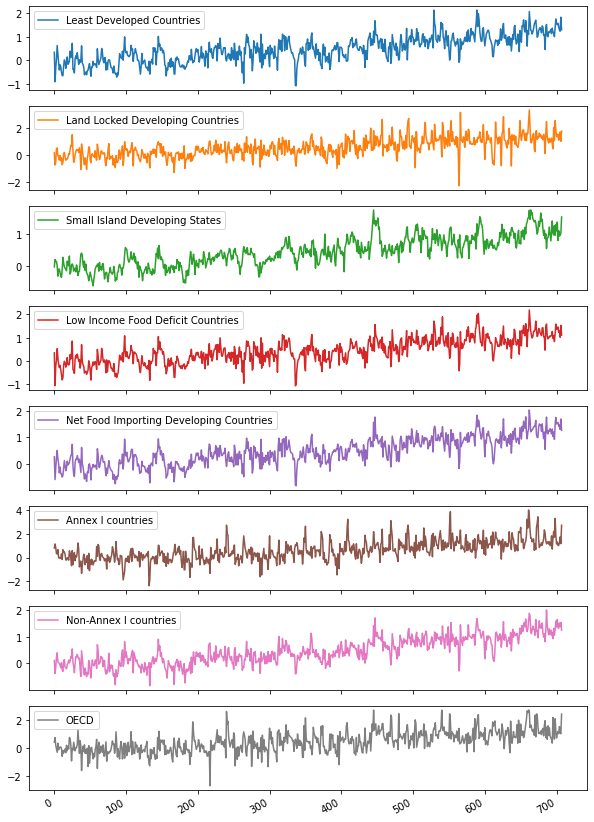


========== Correlación ==========



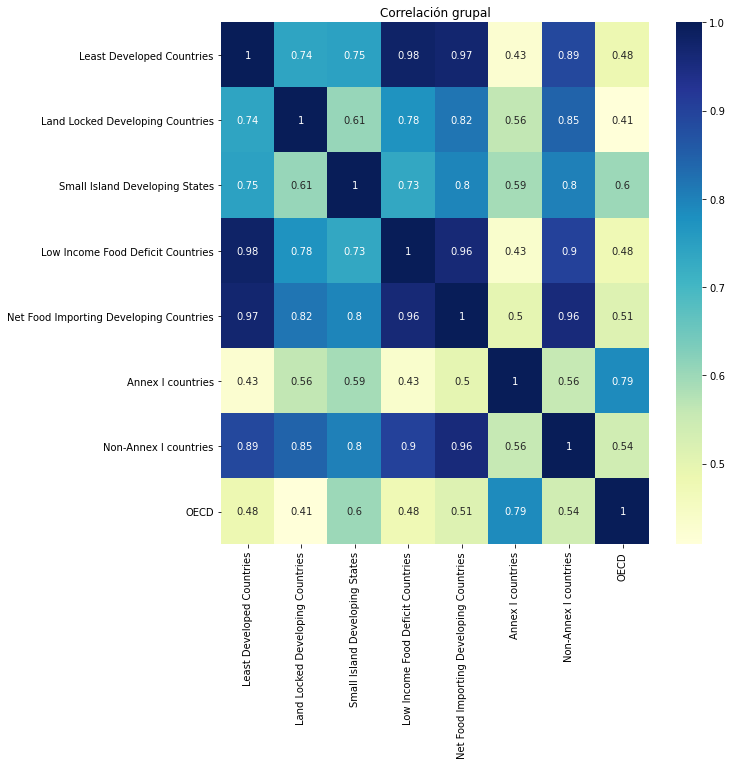


========== Histogramas ==========



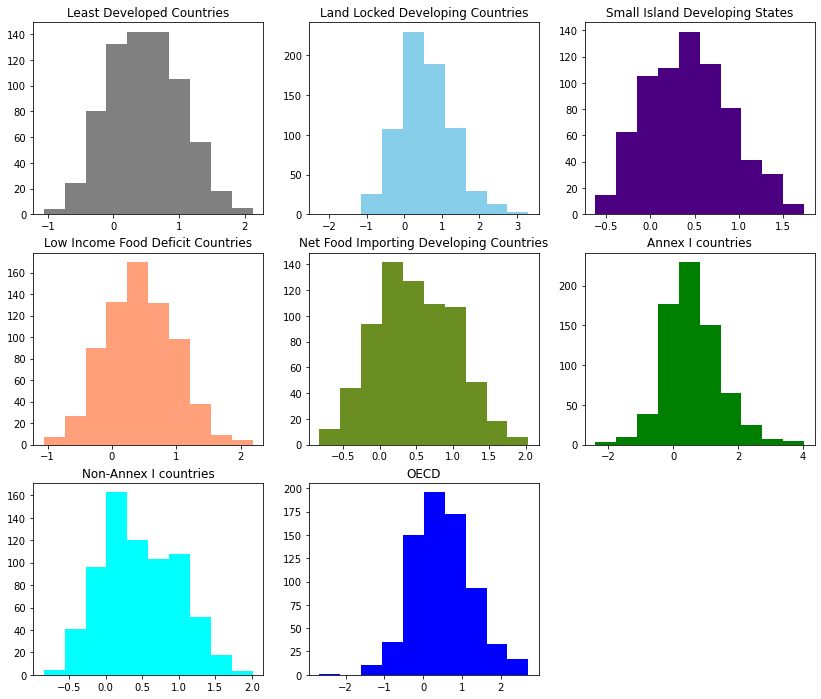


========== Normalidad ==========


 • QQPlots 



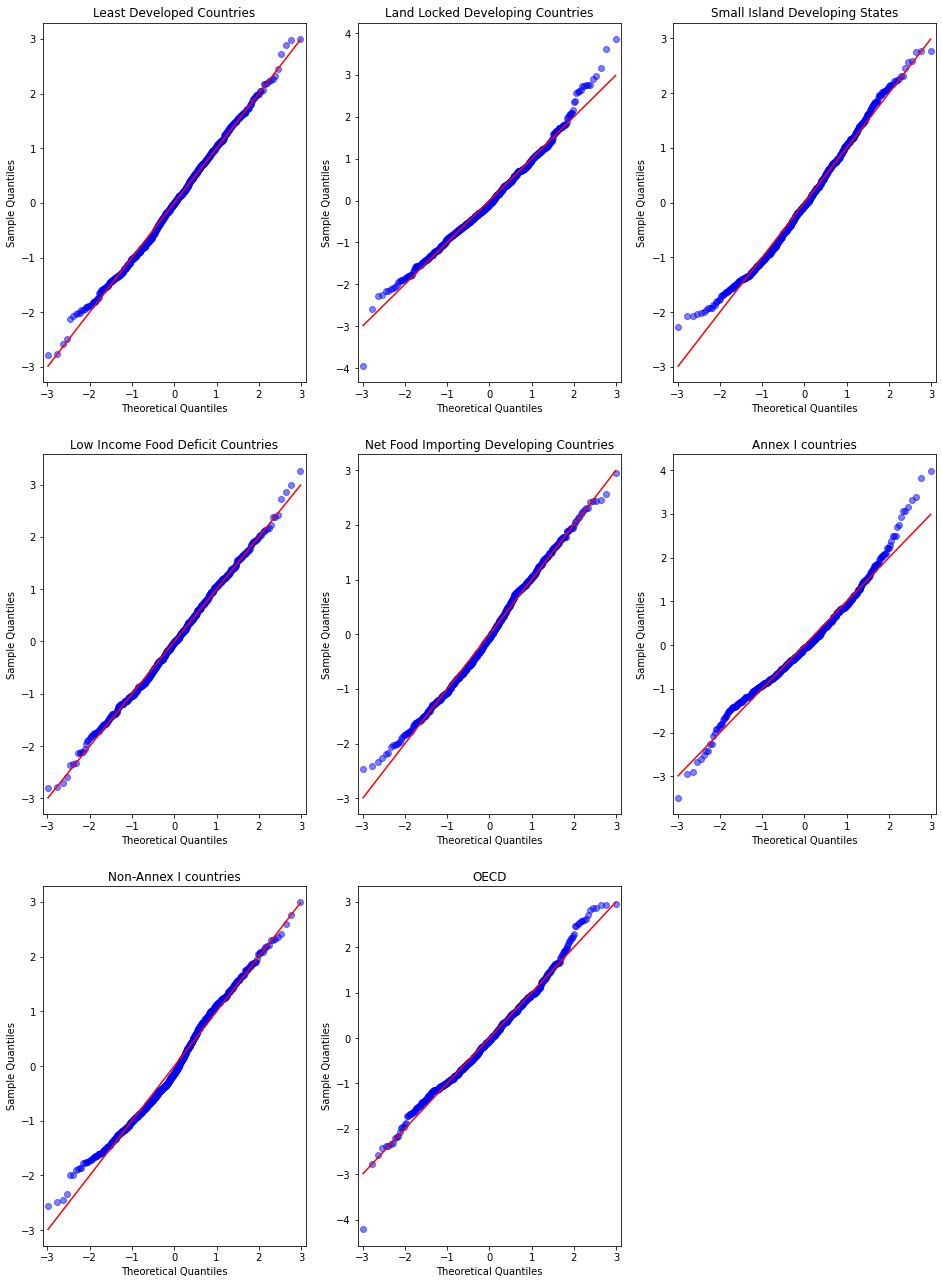


 • Curve fitting 



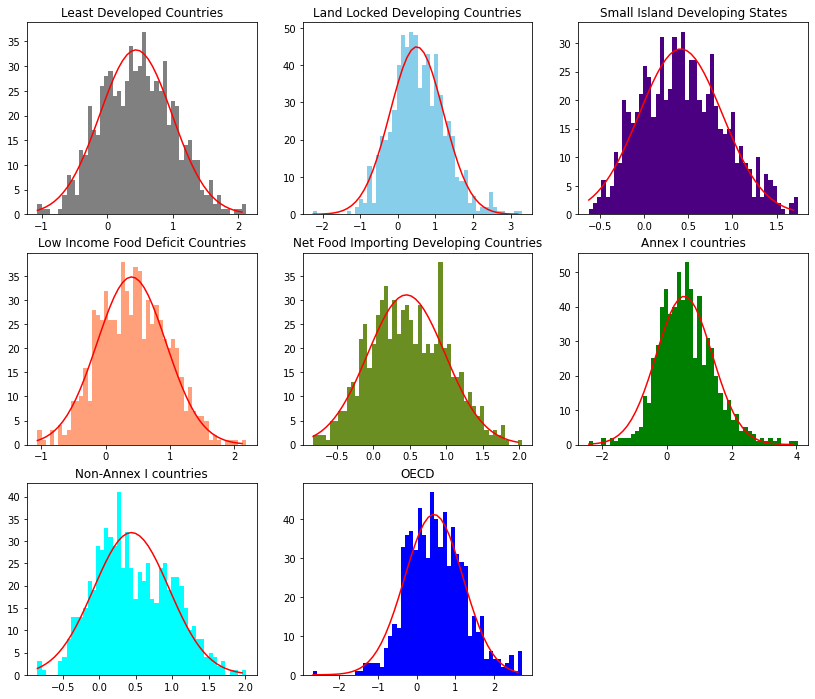

 • Hypothesis Test 

(Statistic,pvalue) 

Least Developed Countries (5.250634508934429, 0.07241677884288807)
Land Locked Developing Countries (21.90653822781757, 1.750070986910251e-05)
Small Island Developing States (18.100188537471592, 0.00011737997113606074)
Low Income Food Deficit Countries (2.7364309450158237, 0.2545608252555192)
Net Food Importing Developing Countries (16.291314450774827, 0.0002899919988933164)
Annex I countries (37.95987086254783, 5.7163495189631224e-09)
Non-Annex I countries (24.183888658749037, 5.6044797235763345e-06)
OECD (10.402900964091685, 0.005508568543453837)


In [13]:
descriptiveAnalysis(data=grouped_data['Interest Groups']['Month'])

### Análisis descriptivo base con datos continentales.


========== Datos ==========

     Africa  Americas   Asia  Europe  Oceania
0     0.105     0.339  0.182   1.086    0.235
1    -0.814     0.279 -0.136   1.921   -0.005
2    -0.492    -0.150  0.095   1.863    0.180
3     0.318    -0.303  0.288   0.986    0.578
4     0.684    -0.042  0.064   1.089   -0.160
..      ...       ...    ...     ...      ...
703   1.632     1.019  1.163   1.329    0.458
704   1.411     1.687  1.469   0.964    1.169
705   1.460     0.991  1.623   2.356    1.962
706   1.883     1.275  0.912   1.733    1.191
707   1.371     1.725  1.363   3.075    2.912

[708 rows x 5 columns]

========== Medidas básicas ==========

           Africa    Americas        Asia      Europe     Oceania
count  708.000000  708.000000  708.000000  708.000000  708.000000
mean     0.492147    0.485032    0.474819    0.734213    0.426034
std      0.576287    0.699126    0.716249    1.324875    0.714232
min     -1.202000   -2.296000   -2.011000   -4.030000   -1.343000
25%      0.065000   -0.0

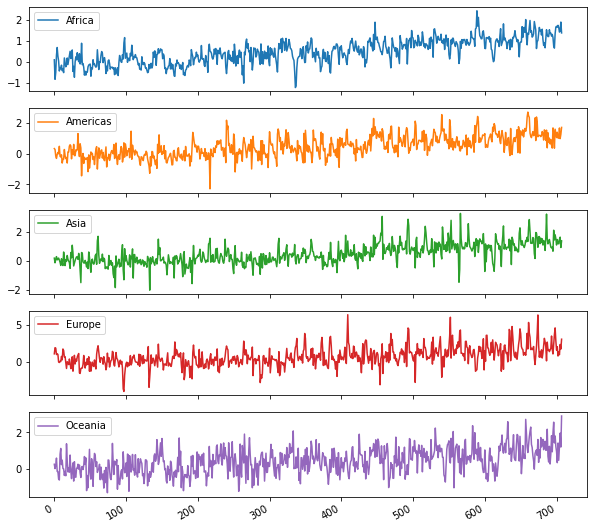


========== Correlación ==========



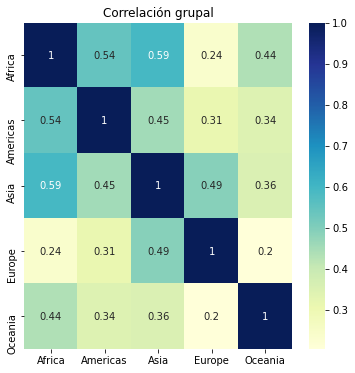


========== Histogramas ==========



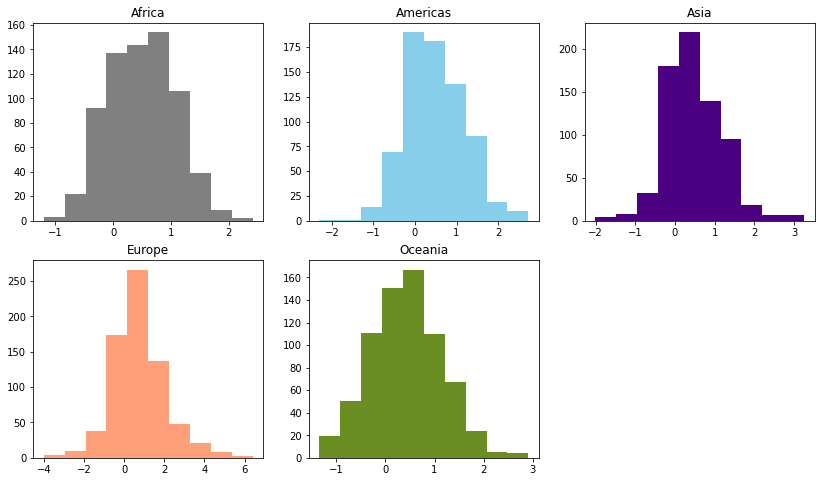


========== Normalidad ==========


 • QQPlots 



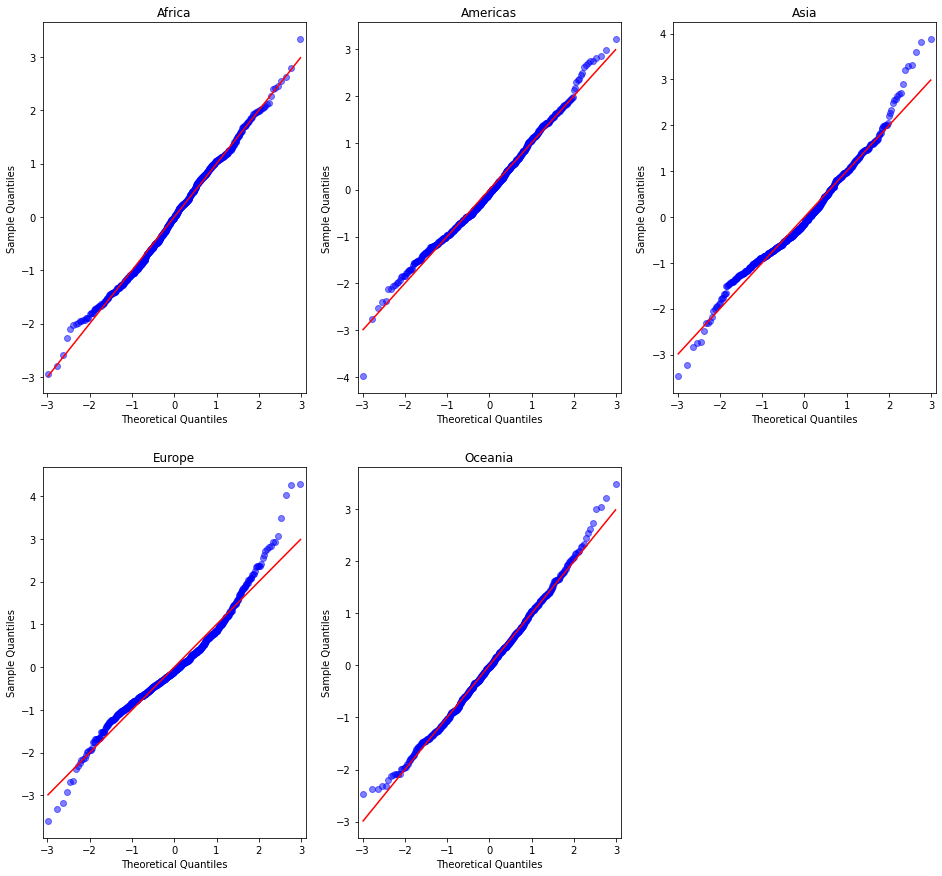


 • Curve fitting 



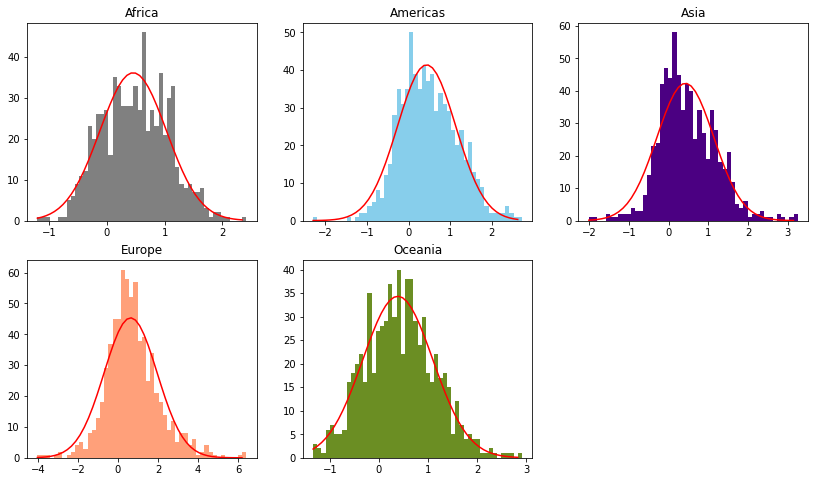

 • Hypothesis Test 

(Statistic,pvalue) 

Africa (6.1131846033735995, 0.047047746888918544)
Americas (7.710959865040156, 0.02116344384744404)
Asia (34.80241336107503, 2.771736622858665e-08)
Europe (63.45267069113582, 1.665051337597115e-14)
Oceania (5.603917818348319, 0.06069105783350436)


In [14]:
descriptiveAnalysis(data=grouped_data['Continents']['Month'])

### Análisis descriptivo base con datos por region


========== Datos ==========

     Eastern Africa  Middle Africa  Northern Africa  Southern Africa  \
0             0.371          0.434            0.127           -0.372   
1            -0.115         -1.057           -0.907            0.164   
2             0.246         -0.276           -1.004            0.076   
3             0.444         -0.008            0.571            0.570   
4             0.988          0.456            0.932           -0.024   
..              ...            ...              ...              ...   
703           1.822          1.332            2.055            2.009   
704           1.112          1.220            1.895            1.177   
705           1.331          0.849            2.182            2.144   
706           1.681          1.964            1.513            2.376   
707           1.269          1.415            1.875            0.543   

     Western Africa  Northern America  Central America  Caribbean  \
0            -0.350             0.69

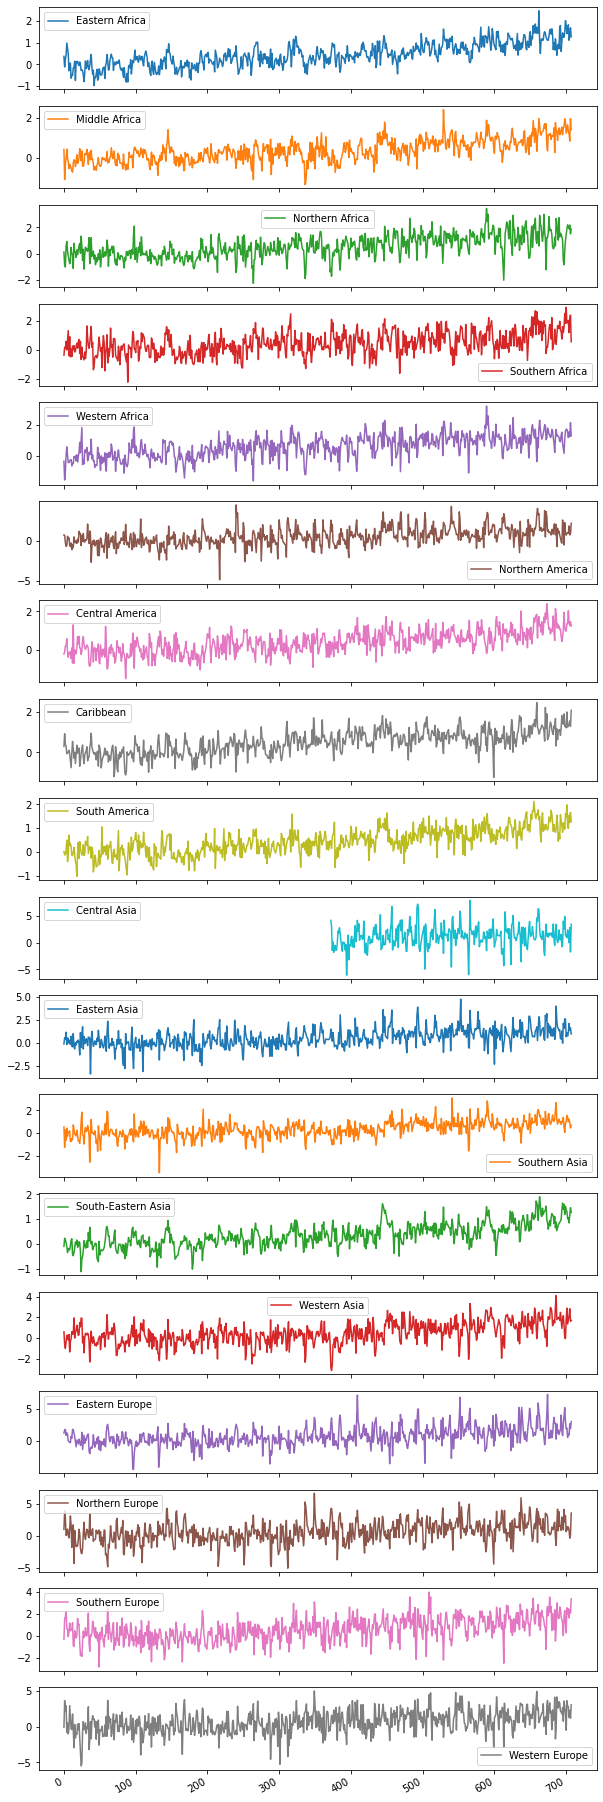


========== Correlación ==========



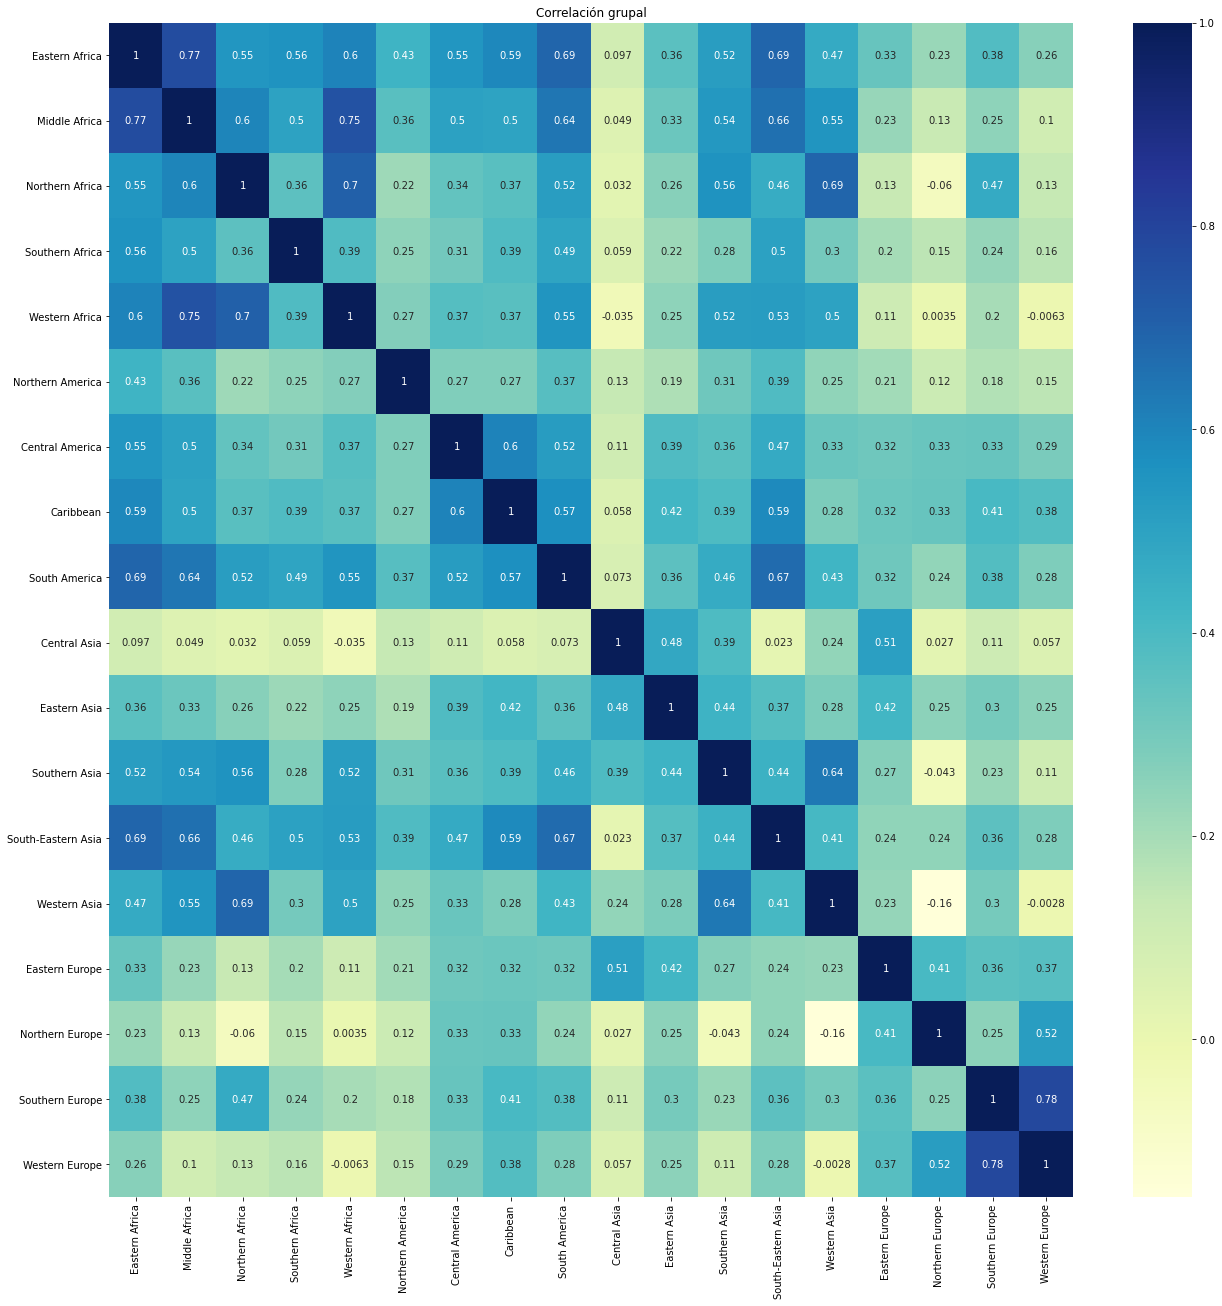


========== Histogramas ==========



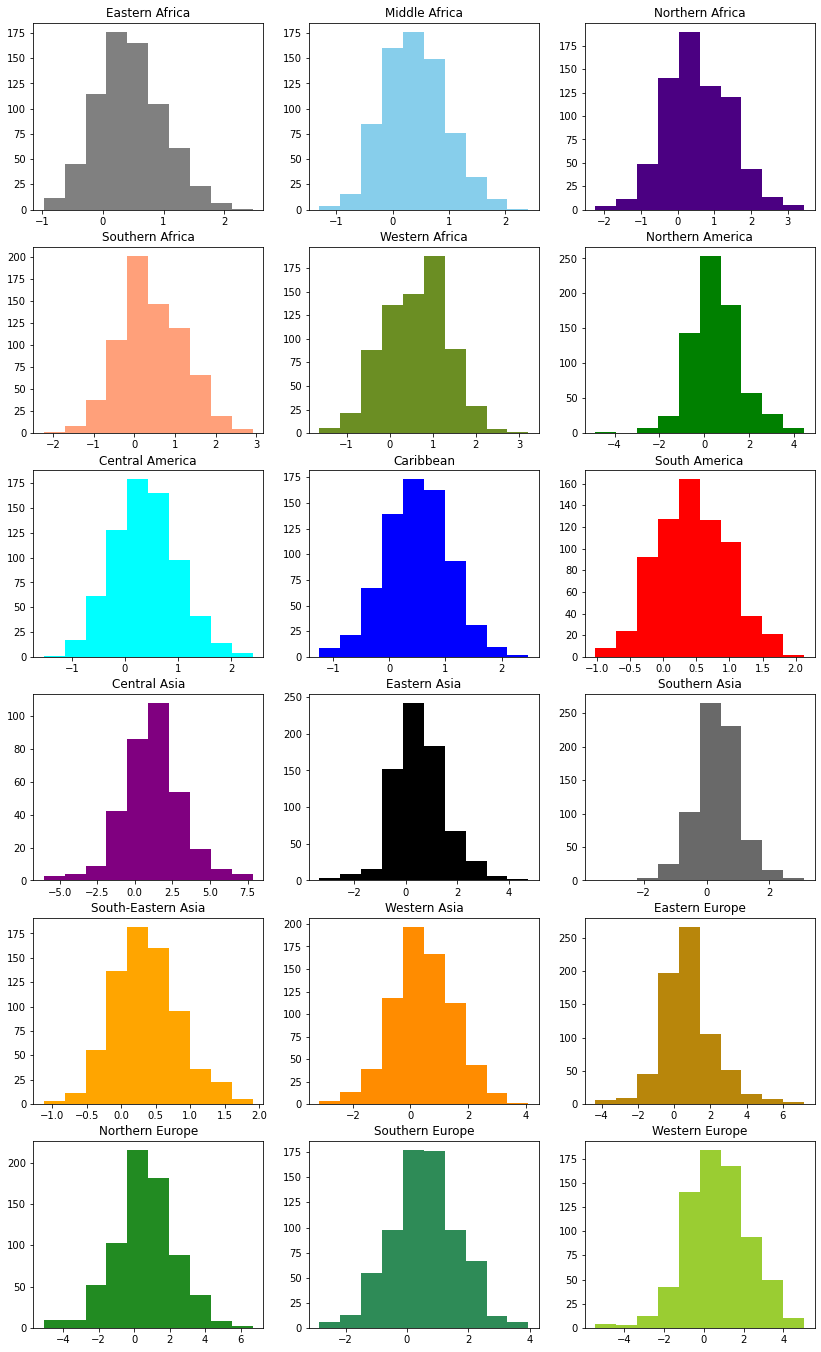


========== Normalidad ==========


 • QQPlots 



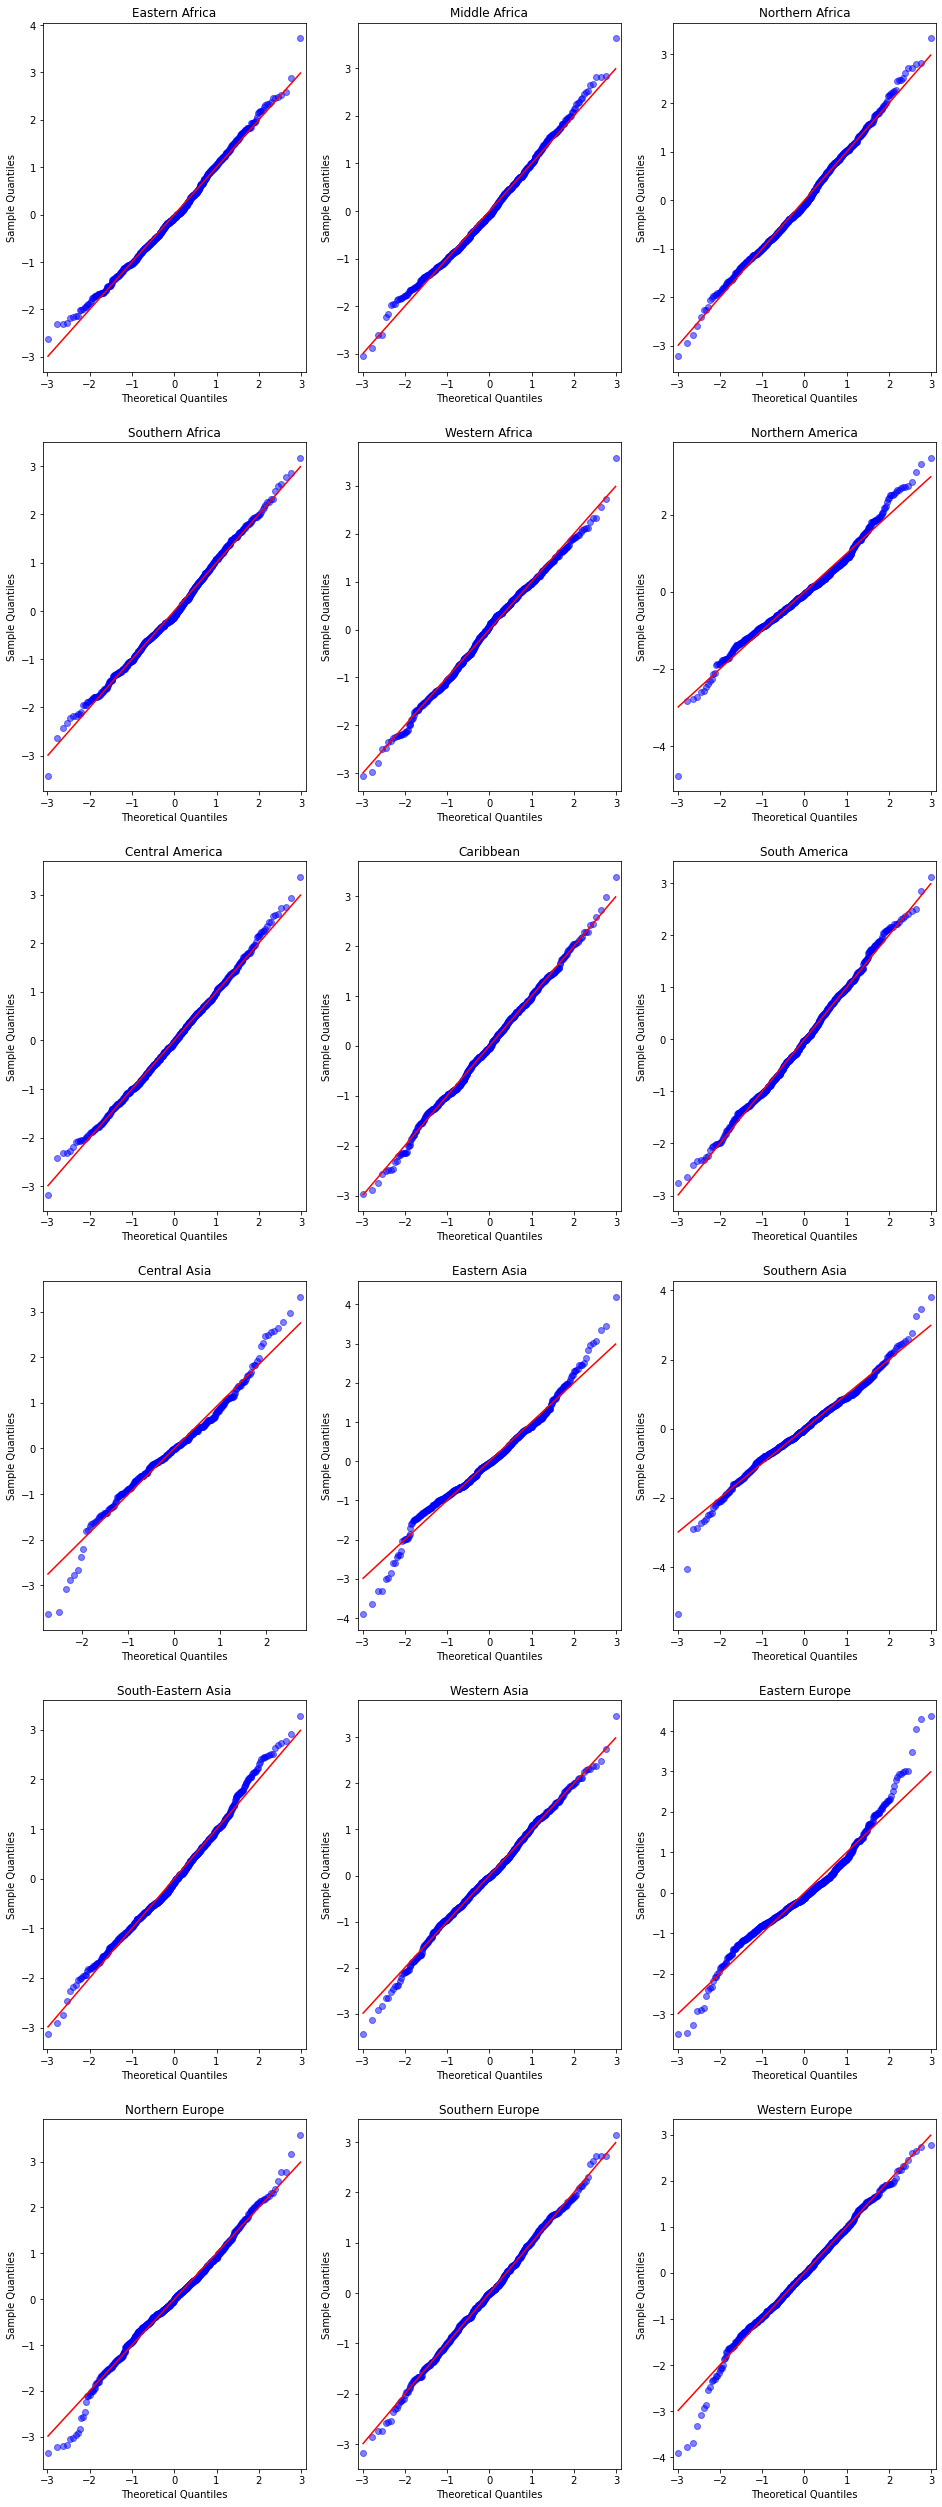


 • Curve fitting 



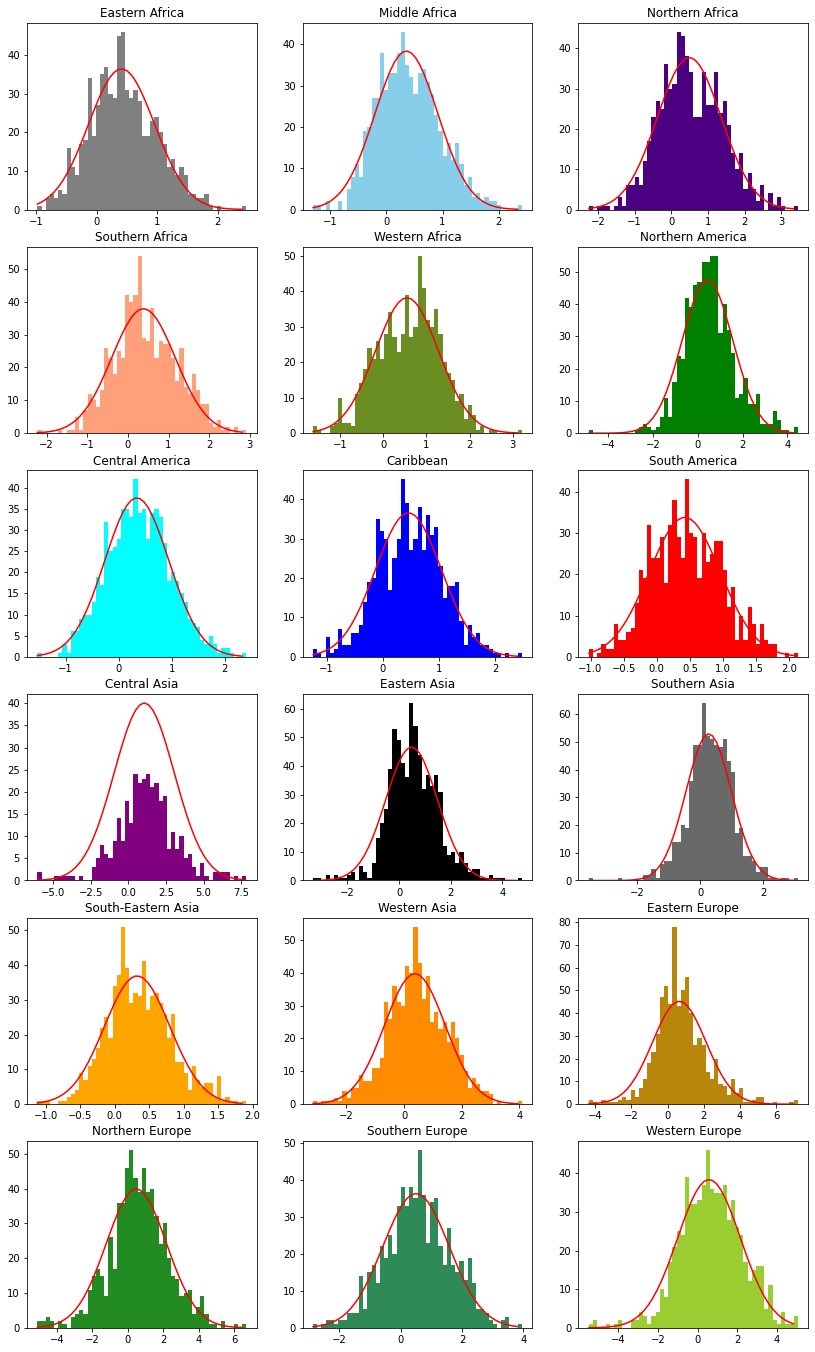

 • Hypothesis Test 

(Statistic,pvalue) 

Eastern Africa (8.298509637709708, 0.01577616820882098)
Middle Africa (9.016170824261426, 0.011019537865346056)
Northern Africa (3.779611241843802, 0.1511011768894743)
Southern Africa (3.3714923848425618, 0.18530610634145753)
Western Africa (2.363245501178993, 0.3067805062097136)
Northern America (25.343073624801185, 3.139218066696641e-06)
Central America (3.10634112814402, 0.21157609370889047)
Caribbean (0.021620803588838056, 0.9892478206076716)
South America (4.567362650558541, 0.10190835751572945)
Central Asia (nan, nan)
Eastern Asia (28.19936002461443, 7.526390959361819e-07)
Southern Asia (35.76428092499083, 1.7135038024739215e-08)
South-Eastern Asia (11.673809096709597, 0.002917860757899346)
Western Asia (2.0116043421559686, 0.36575112212415467)
Eastern Europe (68.23238048884568, 1.5259026712006005e-15)
Northern Europe (11.8649150165536, 0.0026519567684606974)
Southern Europe (0.022982082116285517, 0.9885747287917571)
Western Europe (12.29

In [15]:
descriptiveAnalysis(data=grouped_data['Regions']['Month'])